In [1]:
#libraries
import numpy as np
import libs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

In [14]:
Ud = np.array([2.0, 5.0, 10.0])
human_popsize = 10000
sd = 10**(-np.linspace(1, 5, 20))

iterations = 1000
PopulationSize = 10000

Kimetalsd = 0.009
Boykoetalsd = 0.029

Galeotassd_upper = 0.01/2
Galeotassd_lower = 0.0001/2

Charlesworthsd = 0.0001

In [15]:
Ud_sd_grid = np.meshgrid(Ud, sd)
allUds = Ud_sd_grid[0].flatten()
allsds = Ud_sd_grid[1].flatten()
xmean = allUds/allsds

In [16]:
xmin, std_xmin, xmax, std_xmax = libs.vget_expected_min_max_poisson_sample(xmean, PopulationSize, iterations)
Wbest = libs.vget_absolute_fitness(xmin, allsds, allUds)

In [17]:
interquantile_folddifference = libs.vget_interquantile_folddifference(xmean, allsds)

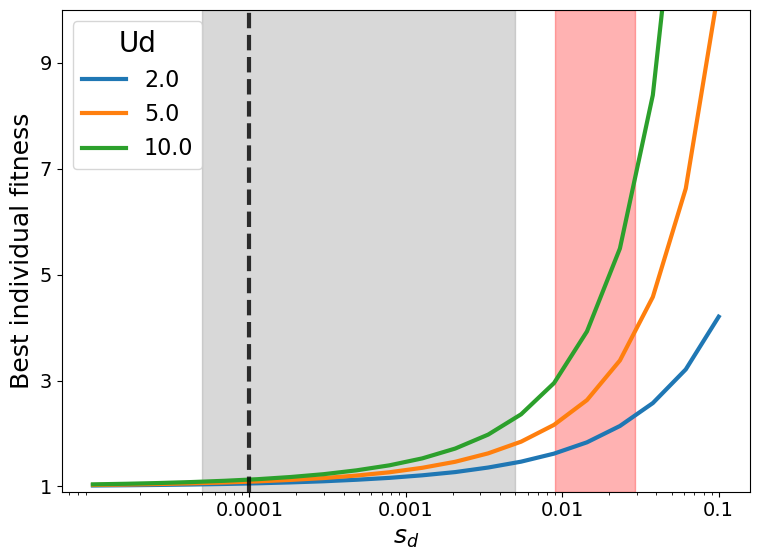

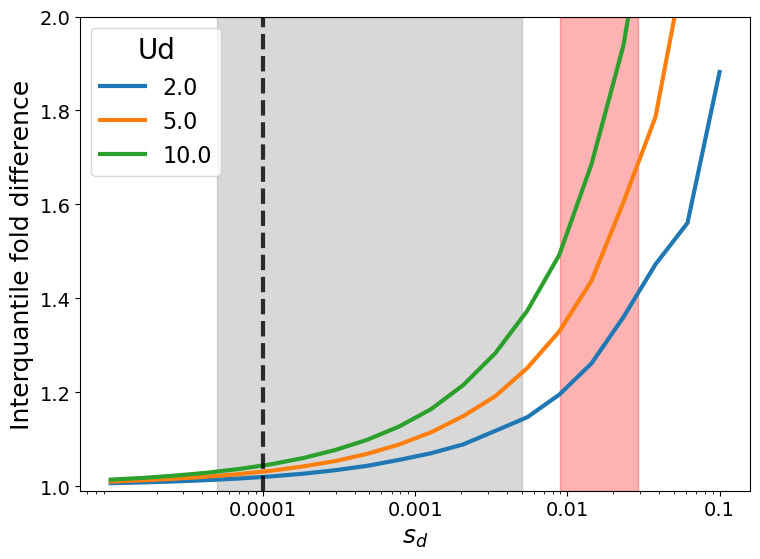

In [18]:
# Combine arrays into a DataFrame
df = pd.DataFrame({
    'Ud': allUds,
    'sd': allsds,
    'Wbest': Wbest,
    'IQFoldDifference': interquantile_folddifference
})

x_values = [0.0001, 0.001, 0.01, 0.1]
x_labels = ['0.0001', '0.001', '0.01', '0.1']

y_values = [1, 3, 5, 7, 9]
y_labels = ['1', '3', '5', '7', '9']

# Plot using matplotlib, colored by Ud
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
for Ud_value in df['Ud'].unique():
    subset = df[df['Ud'] == Ud_value]
    plt.plot(subset['sd'], subset['Wbest'], label=f'{Ud_value}')
plt.xscale('log')
plt.xlabel(r'$s_{d}$')
plt.ylabel('Best individual fitness')
plt.legend(title='Ud')
ax.axvspan(Kimetalsd, Boykoetalsd, color='r', alpha=0.3)
ax.axvspan(Galeotassd_lower, Galeotassd_upper, color='grey', alpha=0.3)
ax.axvline(x=Charlesworthsd, color='black', linestyle='--', alpha=0.8)
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.yaxis.set_ticks(y_values)
ax.yaxis.set_ticklabels(y_labels)
ax.set_ylim(0.9, 10)
plt.tight_layout()
plt.show()

# Plot using matplotlib, colored by Ud
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
for Ud_value in df['Ud'].unique():
    subset = df[df['Ud'] == Ud_value]
    plt.plot(subset['sd'], subset['IQFoldDifference'], label=f'{Ud_value}')
plt.xscale('log')
plt.xlabel(r'$s_{d}$')
plt.ylabel('Interquantile fold difference')
plt.legend(title='Ud')
ax.axvspan(Kimetalsd, Boykoetalsd, color='r', alpha=0.3)
ax.axvspan(Galeotassd_lower, Galeotassd_upper, color='grey', alpha=0.3)
ax.axvline(x=Charlesworthsd, color='black', linestyle='--', alpha=0.8)
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.set_ylim(0.99, 2)
plt.tight_layout()
plt.show()